## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                      
import seaborn as sns
%matplotlib inline

# Set maximum columns to be display in dataframe as 34
pd.set_option("display.max_columns", 34)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 16


#**Mounting Drive**

In [66]:
#mounting drive
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Giving Path**

In [67]:
#Giving path
path="/content/drive/MyDrive/csv/Hotel Bookings (1).csv"


#**Reading Path**

In [68]:
#Reading of dataset
df1=pd.read_csv(path)
df1 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
#total number of rows and columns
print(f' We have total {df1.shape[0]} rows and {df1.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [7]:
#Head counts
df1.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [ ]:
#tail counts
df1.tail(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119370,City Hotel,0,201,2017,August,35,30,1,4,1,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.00,0,2,Check-Out,2017-09-04
119371,City Hotel,0,175,2017,August,35,31,1,3,2,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,42.0,NaN,0,Transient,86.85,0,2,Check-Out,2017-09-04
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04
119373,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04
119374,City Hotel,0,201,2017,August,35,29,1,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,117.00,0,2,Check-Out,2017-09-04
119375,City Hotel,0,200,2017,August,35,30,1,4,2,0.0,0,BB,AUT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,85.50,0,1,Check-Out,2017-09-04
119376,City Hotel,0,165,2017,August,35,29,1,5,3,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,2017-09-04
119377,City Hotel,0,185,2017,August,35,30,1,4,2,0.0,0,SC,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,99.00,0,1,Check-Out,2017-09-04
119378,City Hotel,0,247,2017,August,35,31,1,3,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,86.85,0,0,Check-Out,2017-09-04
119379,City Hotel,0,109,2017,August,35,31,1,3,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Check-Out,2017-09-04


In [ ]:
#info of given data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#list of columns
print(list(df1.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
#creating copy of dataset
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#**Data Description**

### Data Description:

1. **hotel** : Hotel(Resort Hotel or City Hotel) 

2. **is_canceled** : Value indicating if the booking was canceled (1) or not (0)

3. **lead_time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

4. **arrival_date_year** : Year of arrival date

5. **arrival_date_month** : Month of arrival date

6. **arrival_date_week_number** : Week number of year for arrival date

7. **arrival_date_day_of_month** : Day of arrival date

8. **stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9. **stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10. **adults** : *Number of adults

11. **children** : Number of children

12. **babies** : Number of babies

13. **meal** : Type of meal booked. Categories are presented in standard hospitality meal packages:

14. **country** : Country of origin.`

15. **market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16. **distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17. **is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

18. **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. **assigned_room_type** : Code for the type of room assigned to the booking.

22. **booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23. **deposit_type** : Indication on if the customer made a deposit to guarantee the booking.

24. **agent** : ID of the travel agency that made the booking

25. **company** : ID of the company/entity that made the booking or responsible for paying the booking.

26. **days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

27. **customer_type** : Type of booking, assuming one of four categories


28. **adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. **required_car_parking_spaces** : Number of car parking spaces required by the customer

30. **total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)

31. **reservation_status** : Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# For understanding of the data we will have to first understanding the meaning of the data therefore we will see the unique values attained by each column whose meaning we are unable to understand.

In [8]:
df1['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['arrival_date_year'].unique()



In [ ]:
df1['is_canceled'].unique()


In [9]:
df1['distribution_channel'].unique()


array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df1['meal'].unique()


In [ ]:
df1['market_segment'].unique()



In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

#**Data cleaning**

#Checking and removing of duplicate rows 

In [ ]:
#checking of duplicated rows
df2=df1.duplicated().value_counts()
df2

False    87396
True     31994
dtype: int64

In [ ]:
# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df1.duplicated())

In [ ]:
#visualization of percentage through pie chart
mycolors='red','green'
df2.plot.pie(explode=[0.05, 0.05], autopct='%.1f%%', figsize=(10,8),fontsize=18,colors=mycolors)   
plt.title('pie chart of percentage duplicated value counts')


In [ ]:
#dropping the duplicate rows
df1= df1.drop_duplicates()
df1

In [ ]:
df1.shape

#Handling of missing values

In [ ]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]


In [ ]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)


In [ ]:
df1['children'].unique()

 
#this column has 0 values means none of children made the transaction  
#We will replace the null values under this column with mean value of children.

In [ ]:
df1['children'].fillna(df1['children'].mean(), inplace = True)


#Next column with missing value is 'country'. This column represents the country of origin of customer.Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [10]:
df1['country'].fillna('others', inplace = True)

In [11]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]


company                   112593
agent                      16340
children                       4
hotel                          0
previous_cancellations         0
reservation_status             0
dtype: int64

#There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows

In [12]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape


(180, 32)

In [13]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

#Next step is Converting columns to appropriate datatypes.



In [16]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')


#Adding some important columns 

In [18]:
# lets add some new columns

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']   

In [19]:
# Checking the final rows and columns
df1.shape

(119210, 34)

#**EDA (Exploratory Data Analysis)**

# **percentage of no deposit requests**

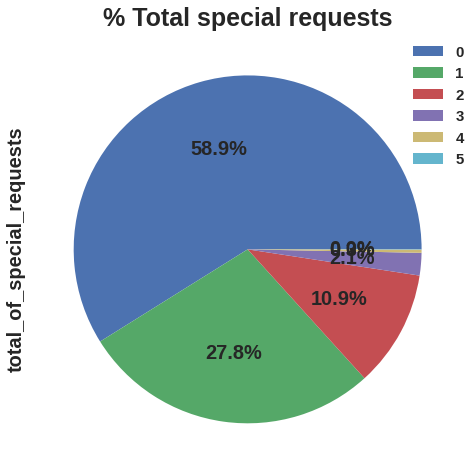

In [41]:
df1['total_of_special_requests'].value_counts().plot.pie(autopct='%2.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Total special requests")
labels=df1['total_of_special_requests'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#**Conclusion**

#58.9% percentage of no deposit requests

#**Reservation status of both the hotels**

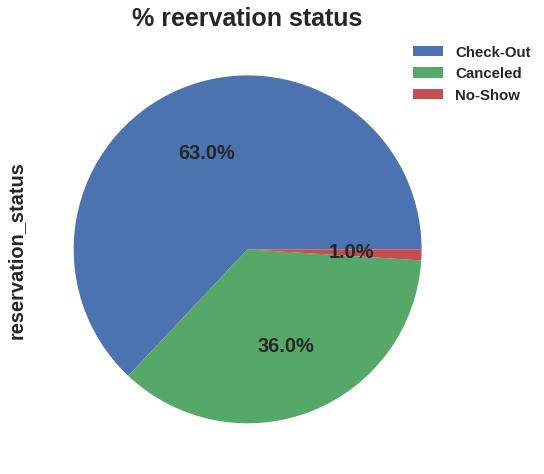

In [12]:
df1['reservation_status'].value_counts().plot.pie(autopct='%2.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% reervation status")
labels=df1['reservation_status'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#**Conclusion**

#62% are Checked out,36.1 are cancelled,1% not showing status due to data not available

#**Percentage of repeated guests**

Text(0.5, 1.0, ' Percentage (%) repeated guests')

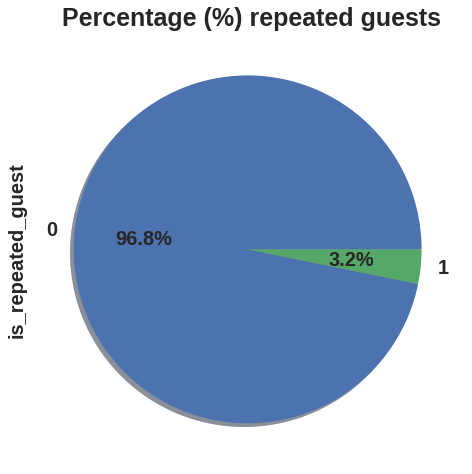

In [69]:
df1['is_repeated_guest'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentage (%) repeated guests")

#96.8% are repeated guests and 3.2% are not repeated guests

#**Type of customers coming in both the hotels**

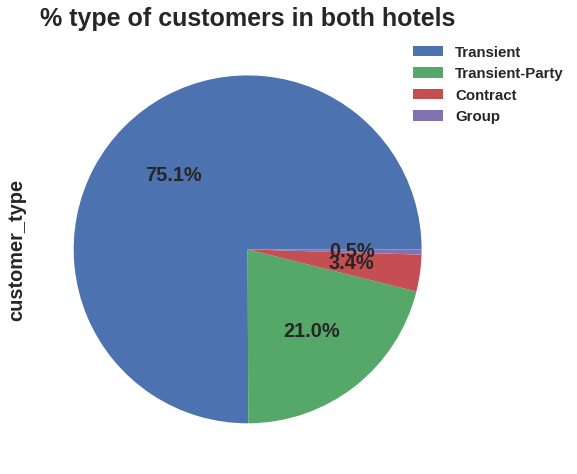

In [20]:
df1['customer_type'].value_counts().plot.pie(autopct='%2.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% type of customers in both hotels")
labels=df1['customer_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#**Conclusion**
#Transient type of peoples most visiting to both hotels

#**Monthwise percentage of people to visit hotel**

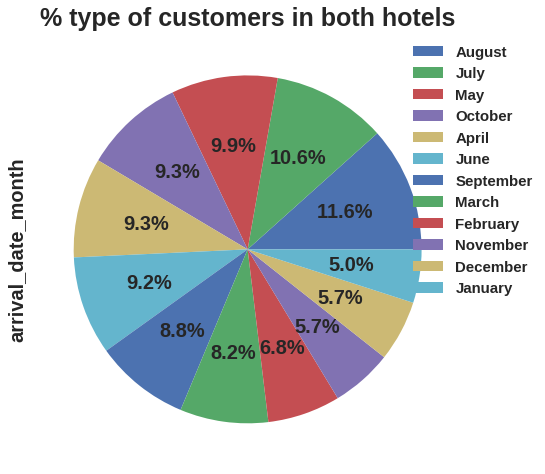

In [21]:
df1['arrival_date_month'].value_counts().plot.pie(autopct='%2.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% type of customers in both hotels")
labels=df1['arrival_date_month'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#**Conclusion**
#August Month is most popular to visit among other months

#**number of persons visited in year**

Text(0.5, 1.0, 'most guests arrival date year')

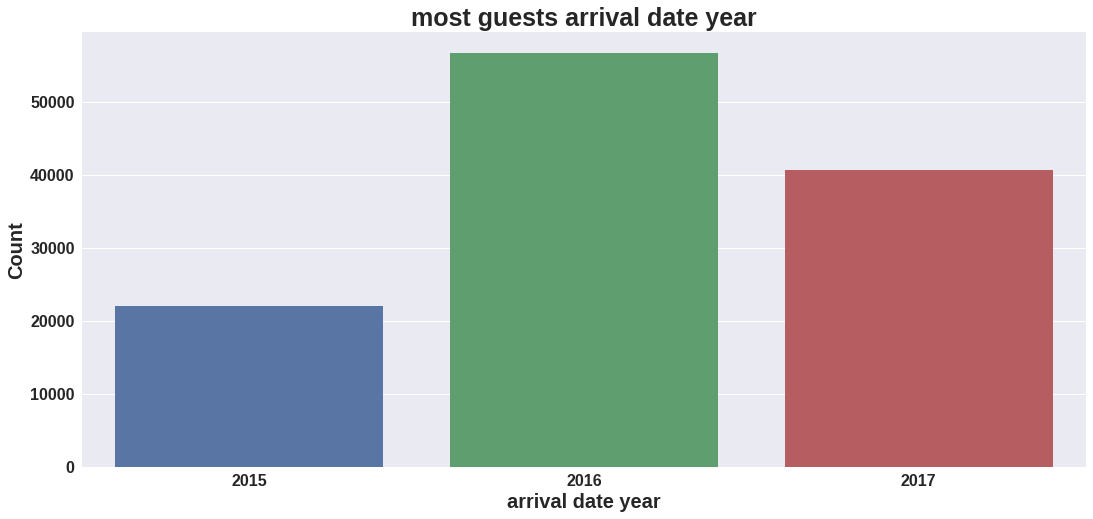

In [28]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1['arrival_date_year'])
plt.xlabel('arrival date year')
plt.ylabel('Count')
plt.title("most guests arrival date year")


#**Conclusion**
#in year 2016 most number of peoples visited in both hotels

#**most guests arrival date of month**

Text(0.5, 1.0, 'most guests arrival date of month')

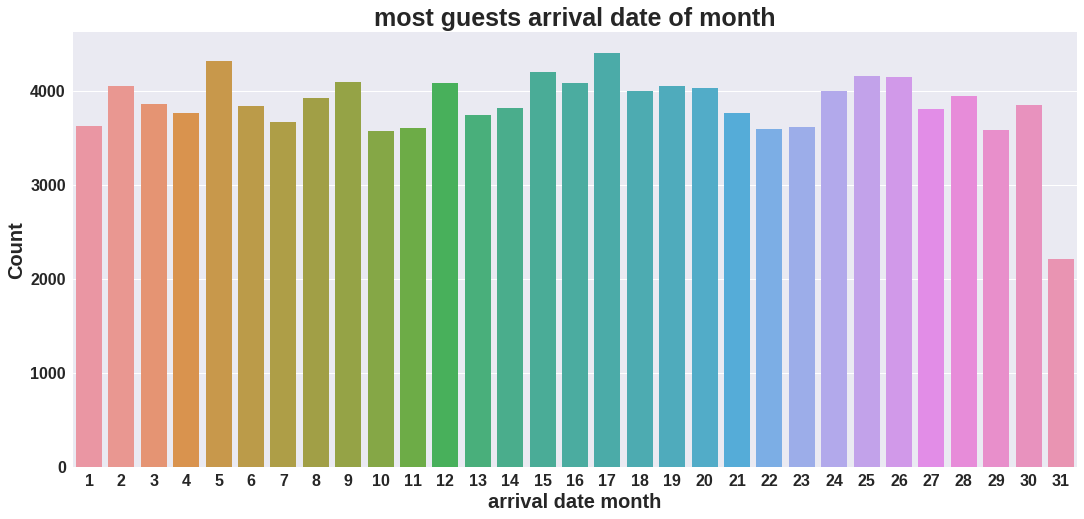

In [35]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1['arrival_date_day_of_month'])
plt.xlabel('arrival date month')
plt.ylabel('Count')
plt.title("most guests arrival date of month")


#**Conclusion**
#Second day of month most preffered by guests to visit hotels.

#**Most guests arrival in week in year**

Text(0.5, 1.0, 'most guests arrival week of year')

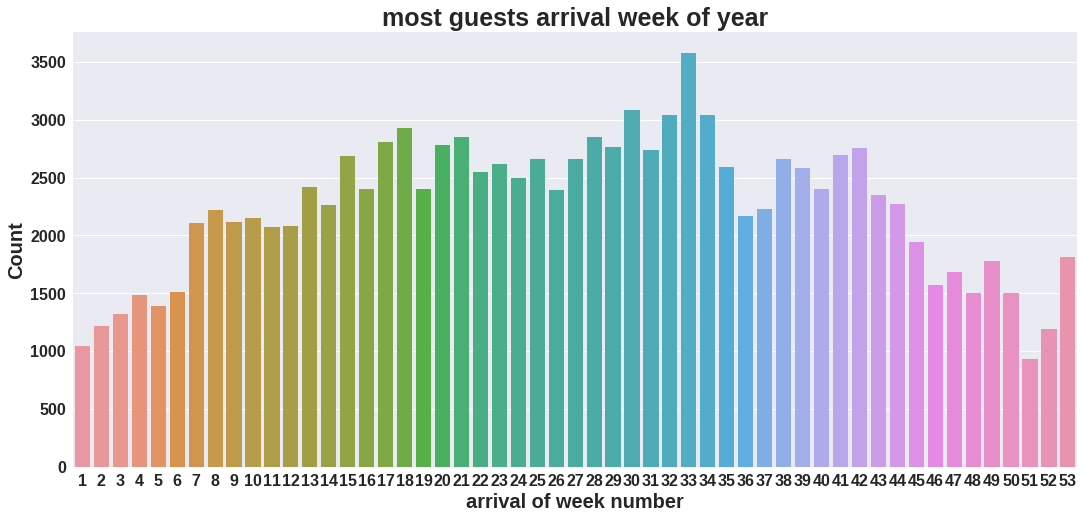

In [34]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1['arrival_date_week_number'])
plt.xlabel('arrival of week number')
plt.ylabel('Count')
plt.title("most guests arrival week of year")


#**Conclusion**
#33 number week have most traffic of guests

#**Reserved Room type Resort hotel vs City hotel**

Text(0.5, 1.0, 'Reserved room type comparison')

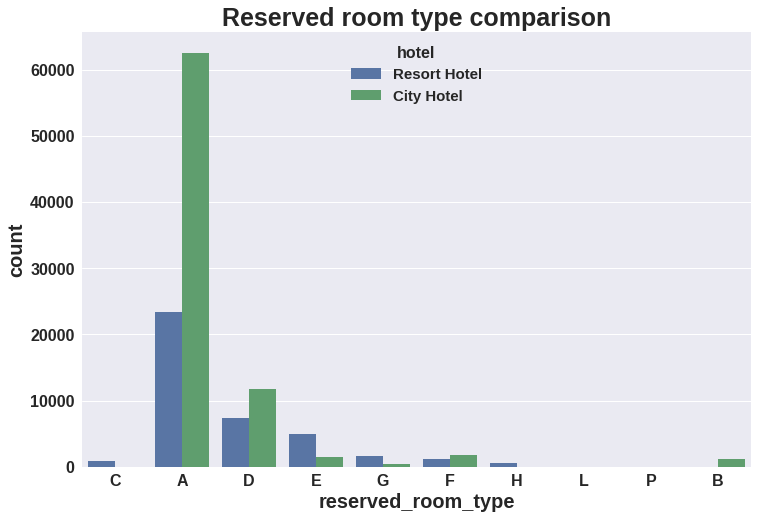

In [45]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['reserved_room_type'],hue=df1['hotel'])
plt.title("Reserved room type comparison")

#**Conclusion**
#A type of room most reserved by city hotel in comparison with Resort hotel.

#**Comparison of stays of weekend nights vs week nights in both the hotels**

<function matplotlib.pyplot.show(*args, **kw)>

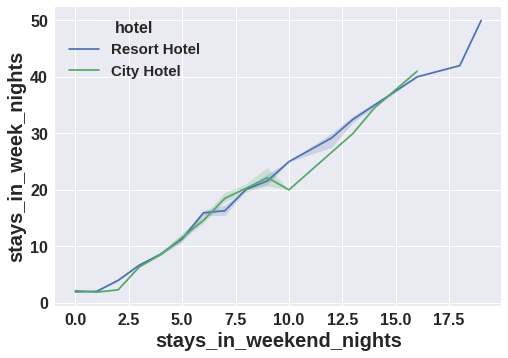

In [47]:
sns.lineplot(x="stays_in_weekend_nights",y="stays_in_week_nights",hue="hotel",data=df1)
plt.show

#**Conclusion**
#lineplot shows both hotels have same kind of stay with some amount of diffrence

#**Comparison of previous bookings cancelled vs previous bookings not cancelled**

<function matplotlib.pyplot.show(*args, **kw)>

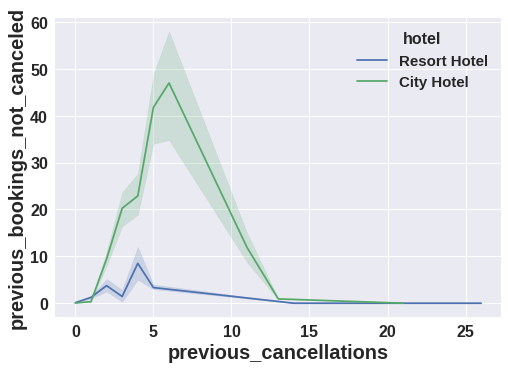

In [52]:

sns.lineplot(x="previous_cancellations",y="previous_bookings_not_canceled",hue="hotel",data=df1)
plt.show

#**Conclusion**
#graph shows that city hotel have less cancellations.


#**Lead time of both hotels**

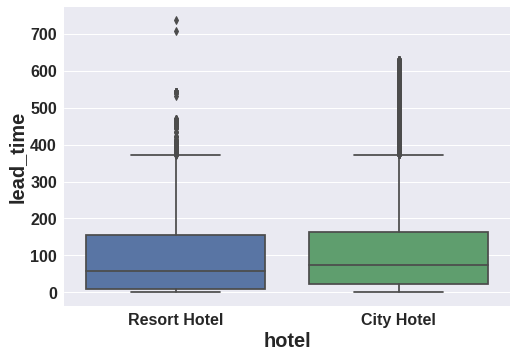

In [59]:
sns.boxplot(x="hotel",y="lead_time",data=df1)
plt.show()

#**Conclusion**
#City hotel have greater lead time that of resort hotel which is slight less than median 

#**correlation plot**

In [60]:
df1.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


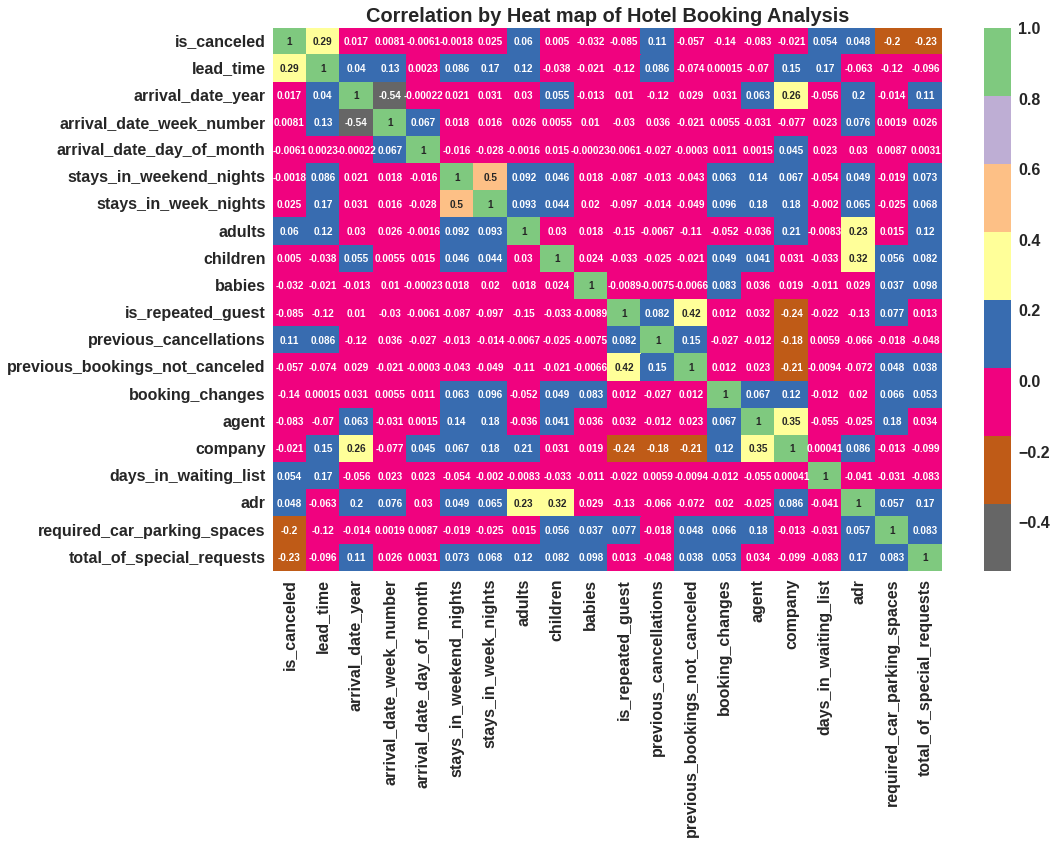

In [61]:
#Defining correlations by heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True, cmap='Accent_r')
plt.title("Correlation by Heat map of Hotel Booking Analysis",size='20');
     

#**Conclusions**
###1) is_canceled and same_room_alloted_or_not are negatively corelated. That means  customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
###2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
###3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.
###4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

#**Final Conclusions**
1.People doing total number of special requests for no deposit.
2.After checking of reservation status we found that  62% are checked out 36.1 are cancelled and 1% data not showing due to unavailability
3.when we have checked it is found that 96.8% are repeated guests and 3.2% guests are not in both the hotels
4.After analysing it is found that Transient type of peoples most visiting to both hotels
5.In both the hotels the august month is most popular to visit.
6.we found that in 2016 most of peoples visited the hotel
7.The second day of month most preffered by guests to visit hotels
8.When we analyze all weeks the 33 number week have most traffic of guests
9.A type of room most reserved by city hotel in comparison with resort hotel.
10.lineplot shows both hotels have same kind of stay with some amount of diffrence
11.City hotel have less cancellations.
12.City hotel have greater lead time that of resort hotel which slight less than lead median time.